### Car Price Predict
#### This project is aiming to predict car price with provided data.
#### I will mainly use multi-variable linear regression for predicting with necessary checking such as normality, independence etc...

### Feature Introduction

### 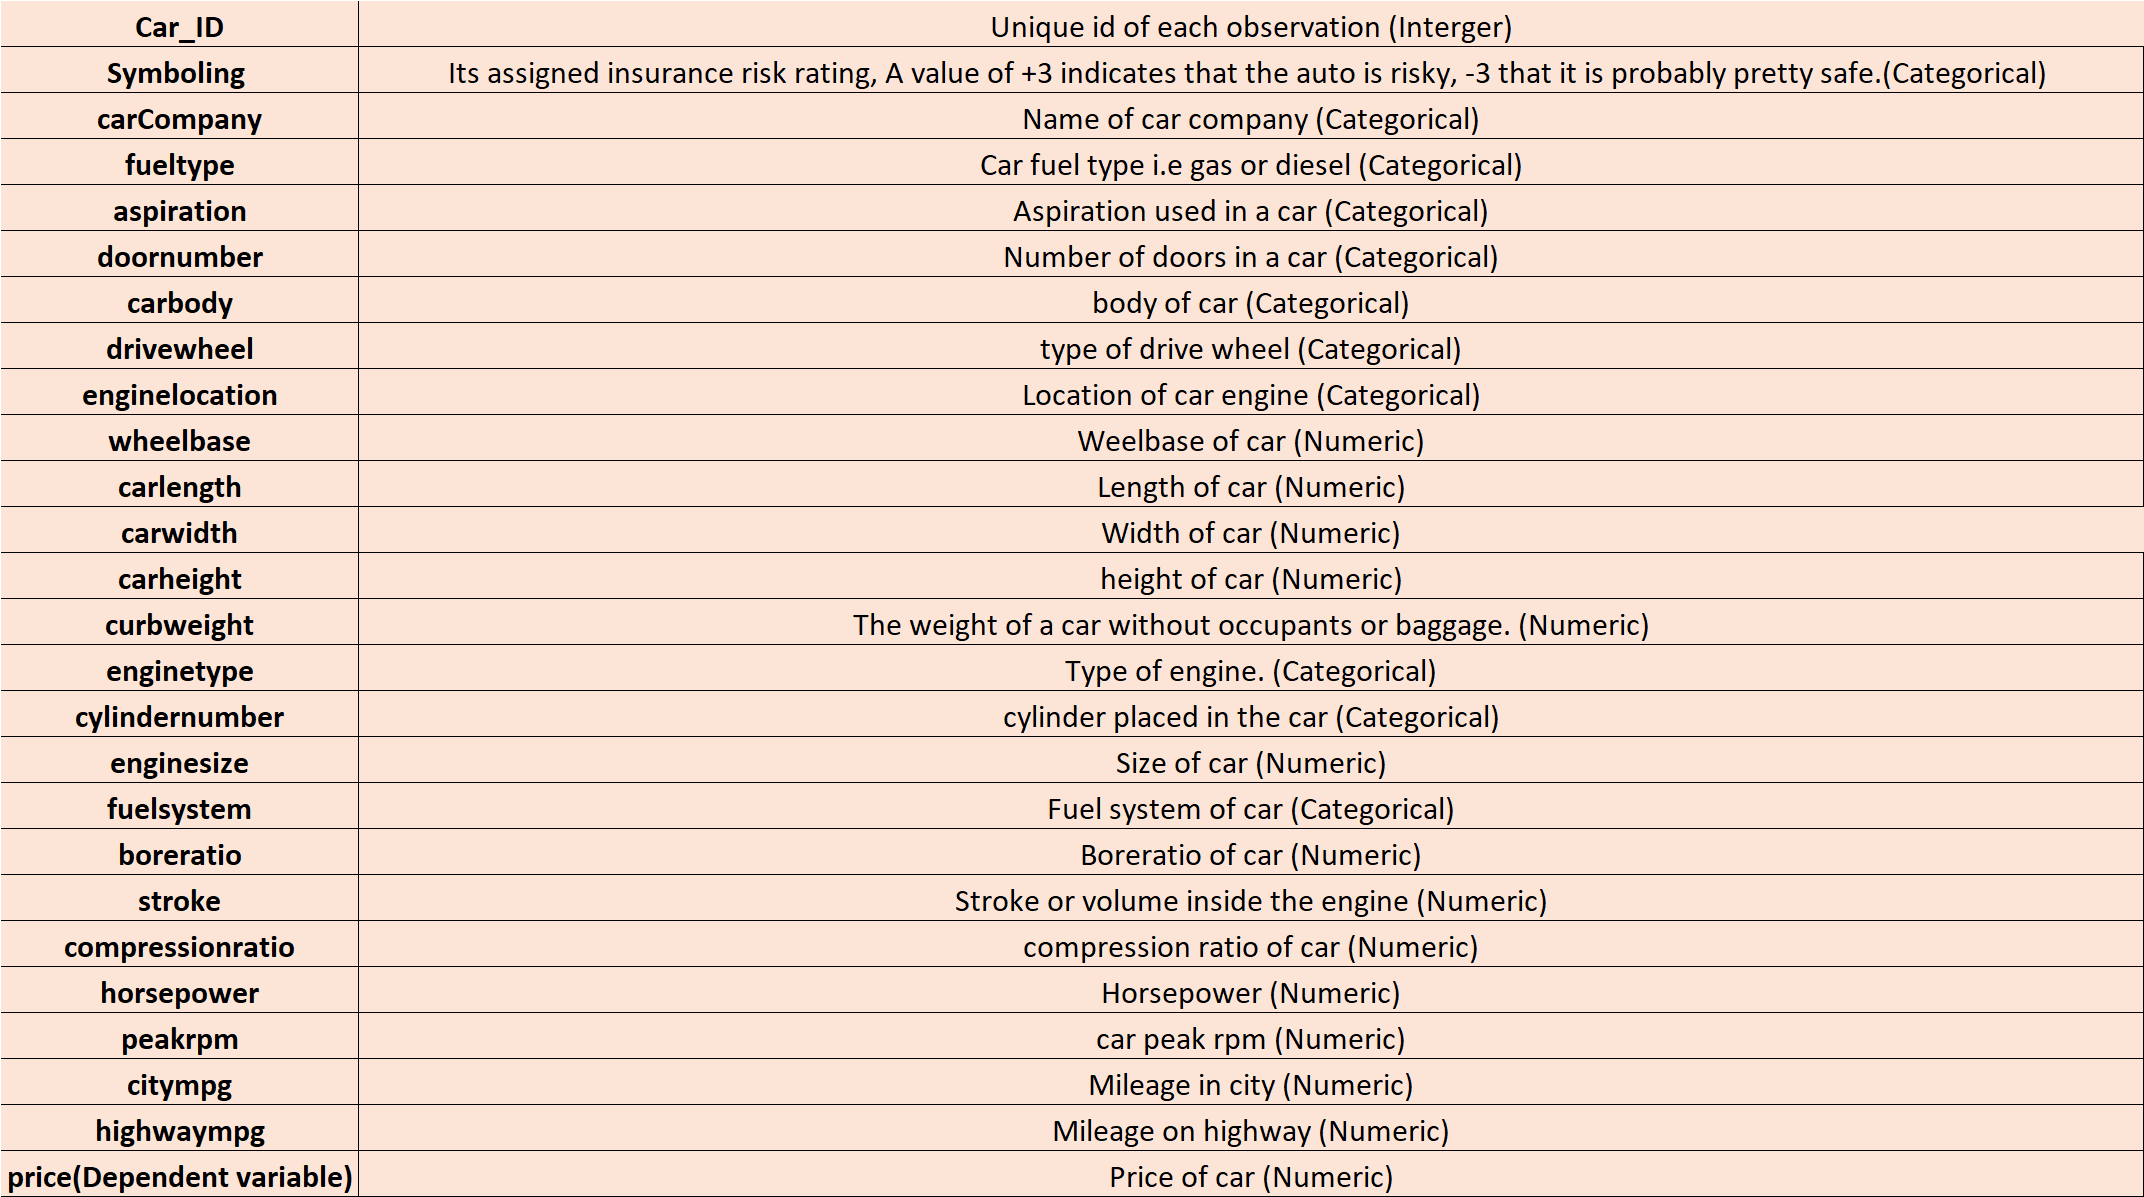Price of car (Numeric)		


### Import library

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LinearRegression

### read dataset

In [2]:
df = pd.read_csv("CarPrice.csv")

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### data processing

#### Split CarName to Company and model

In [4]:
df[["Company", "Model"]] = df['CarName'].str.split(" ", n = 1, expand = True)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,246


#### Drop None rows, CarName and car_ID

In [5]:
#for these rows, "Model" column is None, so we need to drop it
df = df.drop(df[~df["CarName"].str.contains(" ")].index, axis = 0)


In [6]:
df = df.drop(["CarName", "car_ID"], axis = 1)
df


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,246


#### check typo for all category features

In [7]:
#check if there is any typo on Company
df["Company"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [8]:
#replace typo
df["Company"] = df["Company"].str.replace("maxda", "mazda")
df["Company"] = df["Company"].str.replace("nissan", "Nissan")
df["Company"] = df["Company"].str.replace("porcshce", "porshe")
df["Company"] = df["Company"].str.replace("toyouta", "toyota")

In [9]:
df["Company"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'porshe', 'renault',
       'saab', 'subaru', 'toyota', 'vokswagen', 'volkswagen', 'vw',
       'volvo'], dtype=object)

In [10]:
#combine some rows in model
df["Model"].unique()

array(['giulia', 'stelvio', 'Quadrifoglio', '100 ls', '100ls', 'fox',
       '5000', '4000', '5000s (diesel)', '320i', 'x1', 'x3', 'z4', 'x4',
       'x5', 'impala', 'monte carlo', 'vega 2300', 'rampage',
       'challenger se', 'd200', 'monaco (sw)', 'colt hardtop',
       'colt (sw)', 'coronet custom', 'dart custom',
       'coronet custom (sw)', 'civic', 'civic cvcc', 'accord cvcc',
       'accord lx', 'civic 1500 gl', 'accord', 'civic 1300', 'prelude',
       'civic (auto)', 'MU-X', 'D-Max ', 'D-Max V-Cross', 'xj', 'xf',
       'xk', 'rx3', 'glc deluxe', 'rx2 coupe', 'rx-4', '626', 'glc',
       'rx-7 gs', 'glc 4', 'glc custom l', 'glc custom',
       'electra 225 custom', 'century luxus (sw)', 'century', 'skyhawk',
       'opel isuzu deluxe', 'skylark', 'century special',
       'regal sport coupe (turbo)', 'cougar', 'mirage', 'lancer',
       'outlander', 'g4', 'mirage g4', 'montero', 'pajero', 'versa',
       'gt-r', 'rogue', 'latio', 'titan', 'leaf', 'juke', 'note',
       'cli

In [11]:
def replace_contain_chars(text, target = "civic"):
    if (target in text):
        return target
    else:
        return text
df["Model"] = df["Model"].apply(replace_contain_chars)

In [12]:
df["Model"].unique()

array(['giulia', 'stelvio', 'Quadrifoglio', '100 ls', '100ls', 'fox',
       '5000', '4000', '5000s (diesel)', '320i', 'x1', 'x3', 'z4', 'x4',
       'x5', 'impala', 'monte carlo', 'vega 2300', 'rampage',
       'challenger se', 'd200', 'monaco (sw)', 'colt hardtop',
       'colt (sw)', 'coronet custom', 'dart custom',
       'coronet custom (sw)', 'civic', 'accord cvcc', 'accord lx',
       'accord', 'prelude', 'MU-X', 'D-Max ', 'D-Max V-Cross', 'xj', 'xf',
       'xk', 'rx3', 'glc deluxe', 'rx2 coupe', 'rx-4', '626', 'glc',
       'rx-7 gs', 'glc 4', 'glc custom l', 'glc custom',
       'electra 225 custom', 'century luxus (sw)', 'century', 'skyhawk',
       'opel isuzu deluxe', 'skylark', 'century special',
       'regal sport coupe (turbo)', 'cougar', 'mirage', 'lancer',
       'outlander', 'g4', 'mirage g4', 'montero', 'pajero', 'versa',
       'gt-r', 'rogue', 'latio', 'titan', 'leaf', 'juke', 'note',
       'clipper', 'nv200', 'dayz', 'fuga', 'otti', 'teana', 'kicks',
       '50

In [13]:
#check typo in fueltype
df["fueltype"].unique()

array(['gas', 'diesel'], dtype=object)

In [14]:
#check typo in aspiration
df["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

In [15]:
#check typo in doornumber
df["doornumber"].unique()

array(['two', 'four'], dtype=object)

In [16]:
#check typo in carbody
df["carbody"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [17]:
#check typo in drivewheel
df["drivewheel"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [18]:
#check typo in enginelocation
df["enginelocation"].unique()

array(['front', 'rear'], dtype=object)

In [19]:
#check typo in enginetype
df["enginetype"].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [20]:
df[df["enginetype"].str.contains("ohcv")]
#Here I initially want to replace ohcv to ohc because on internet, theres no introduction with ohcv
#But here are actually 14 rows, so I dont think it is a typo

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
49,0,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,...,3.54,2.76,11.5,262,5000,13,17,36000.0,jaguar,xk
71,-1,gas,std,four,sedan,rwd,front,115.6,202.6,71.7,...,3.46,3.10,8.3,155,4750,16,18,34184.0,buick,opel isuzu deluxe
72,3,gas,std,two,convertible,rwd,front,96.6,180.3,70.5,...,3.46,3.10,8.3,155,4750,16,18,35056.0,buick,skylark
73,0,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,...,3.80,3.35,8.0,184,4500,14,16,40960.0,buick,century special
74,1,gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,...,3.80,3.35,8.0,184,4500,14,16,45400.0,buick,regal sport coupe (turbo)
101,0,gas,std,four,sedan,fwd,front,100.4,181.7,66.5,...,3.43,3.27,9.0,152,5200,17,22,13499.0,Nissan,dayz
102,0,gas,std,four,wagon,fwd,front,100.4,184.6,66.5,...,3.43,3.27,9.0,152,5200,17,22,14399.0,Nissan,fuga
103,0,gas,std,four,sedan,fwd,front,100.4,184.6,66.5,...,3.43,3.27,9.0,152,5200,19,25,13499.0,Nissan,otti
104,3,gas,std,two,hatchback,rwd,front,91.3,170.7,67.9,...,3.43,3.27,9.0,160,5200,19,25,17199.0,Nissan,teana


In [21]:
#check typo in cylindernumber
df["cylindernumber"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [22]:
#check typo in fuelsystem
df["fuelsystem"].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

#### standardize numeric features

In [23]:
#record mean and sd for numeric features for further re-scale
mean_numeric = {}
sd_numeric = {}
for column in df.columns:
    if (df[column].dtype == "int64" or df[column].dtype == "float64"):
        mean_numeric[column] = df[column].mean()
        sd_numeric[column] = df[column].std()

In [24]:
df["symboling"] = df["symboling"].astype(object)
numeric_columns = []
for column in df.columns:
    if (df[column].dtype in ["int64", "float64"]):
        numeric_columns.append(column)
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,3,gas,std,two,convertible,rwd,front,-1.691128,-0.434186,-0.850551,...,0.530087,-1.911707,-0.289225,0.166973,-0.267799,-0.636887,-0.537054,0.018531,alfa-romero,giulia
1,3,gas,std,two,convertible,rwd,front,-1.691128,-0.434186,-0.850551,...,0.530087,-1.911707,-0.289225,0.166973,-0.267799,-0.636887,-0.537054,0.395285,alfa-romero,stelvio
2,1,gas,std,two,hatchback,rwd,front,-0.711886,-0.239187,-0.197236,...,-2.396250,0.679406,-0.289225,1.254664,-0.267799,-0.943257,-0.682417,0.395285,alfa-romero,Quadrifoglio
3,2,gas,std,four,sedan,fwd,front,0.167772,0.199562,0.129422,...,-0.507095,0.449813,-0.038016,-0.060683,0.779661,-0.177332,-0.100966,0.075576,audi,100 ls
4,2,gas,std,four,sedan,4wd,front,0.101383,0.199562,0.222752,...,-0.507095,0.449813,-0.540435,0.268153,0.779661,-1.096442,-1.263867,0.514392,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,1.711323,1.190810,1.389386,...,1.678397,-0.370159,-0.163620,0.242858,0.570169,-0.330517,-0.391691,0.438539,volvo,145e (sw)
201,-1,gas,turbo,four,sedan,rwd,front,1.711323,1.190810,1.342721,...,1.678397,-0.370159,-0.364588,1.406435,0.360677,-0.943257,-0.827779,0.714366,volvo,144ea
202,-1,gas,std,four,sedan,rwd,front,1.711323,1.190810,1.389386,...,0.937552,-1.288528,-0.339467,0.748761,0.779661,-1.096442,-1.118504,1.020283,volvo,244dl
203,-1,diesel,turbo,four,sedan,rwd,front,1.711323,1.190810,1.389386,...,-1.173856,0.449813,3.227710,0.040497,-0.686783,0.129038,-0.537054,1.143778,volvo,246


#### Convert ordinary value from string to int

In [25]:
df["doornumber"] = df["doornumber"].apply(lambda x: 2 if x == "two" else 4)

#### Normalize category features

In [26]:
encoder = LabelEncoder()
for column in df.columns:
    if (df[column].dtype == "object" and column != "symboling"):
        df[column] = encoder.fit_transform(df[column])

In [27]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,3,1,0,2,0,2,0,-1.691128,-0.434186,-0.850551,...,0.530087,-1.911707,-0.289225,0.166973,-0.267799,-0.636887,-0.537054,0.018531,1,74
1,3,1,0,2,0,2,0,-1.691128,-0.434186,-0.850551,...,0.530087,-1.911707,-0.289225,0.166973,-0.267799,-0.636887,-0.537054,0.395285,1,118
2,1,1,0,2,2,2,0,-0.711886,-0.239187,-0.197236,...,-2.396250,0.679406,-0.289225,1.254664,-0.267799,-0.943257,-0.682417,0.395285,1,28
3,2,1,0,4,3,1,0,0.167772,0.199562,0.129422,...,-0.507095,0.449813,-0.038016,-0.060683,0.779661,-0.177332,-0.100966,0.075576,2,0
4,2,1,0,4,3,0,0,0.101383,0.199562,0.222752,...,-0.507095,0.449813,-0.540435,0.268153,0.779661,-1.096442,-1.263867,0.514392,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,4,3,2,0,1.711323,1.190810,1.389386,...,1.678397,-0.370159,-0.163620,0.242858,0.570169,-0.330517,-0.391691,0.438539,23,5
201,-1,1,1,4,3,2,0,1.711323,1.190810,1.342721,...,1.678397,-0.370159,-0.364588,1.406435,0.360677,-0.943257,-0.827779,0.714366,23,4
202,-1,1,0,4,3,2,0,1.711323,1.190810,1.389386,...,0.937552,-1.288528,-0.339467,0.748761,0.779661,-1.096442,-1.118504,1.020283,23,6
203,-1,0,1,4,3,2,0,1.711323,1.190810,1.389386,...,-1.173856,0.449813,3.227710,0.040497,-0.686783,0.129038,-0.537054,1.143778,23,8


### Set X and y for regression for further use

In [28]:
df["symboling"] = df["symboling"].astype("int64")
predictor = ["wheelbase", "carlength", "carwidth", "carheight", 
             "curbweight", "enginesize", "boreratio", "stroke", 
             "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg"]
X = df[predictor]
y = df["price"]

### Preparations: check Normality, Independence, Linearity, Homoscedasticity

#### Normality --- residual plot

In [29]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     82.83
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           1.14e-70
Time:                        18:49:34   Log-Likelihood:                -95.023
No. Observations:                 203   AIC:                             218.0
Df Residuals:                     189   BIC:                             264.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.099e-16      0.028  

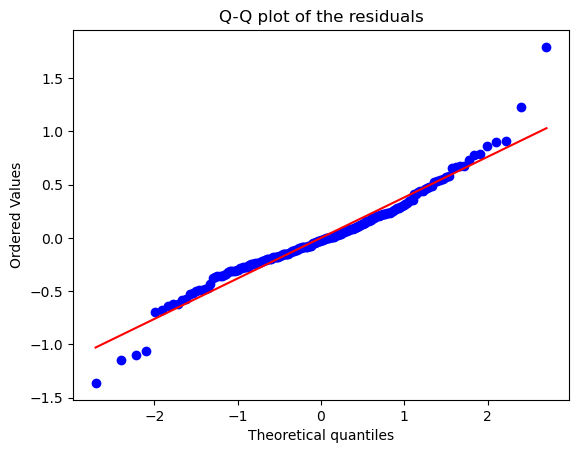

In [30]:
residuals = model.resid
fig = plt.figure()
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q plot of the residuals')
plt.show()

#### Independent --- Durbin-Watson test

In [140]:
from statsmodels.stats.stattools import durbin_watson

In [141]:
durbin_watson(residuals)
#based on test value < 2, it indecates there is positive autocorrelation. So multicollinearity happens

0.9257833735747016

#### Linearity --- Harvey-Collier test / residual vs fitted plot

In [142]:
from statsmodels.stats.diagnostic import linear_harvey_collier

In [143]:
hc_test = linear_harvey_collier(model, skip = 25)
print("Harvey-Collier test statistic:", hc_test)

Harvey-Collier test statistic: TtestResult(statistic=nan, pvalue=nan, df=nan)


Text(0, 0.5, 'Residuals')

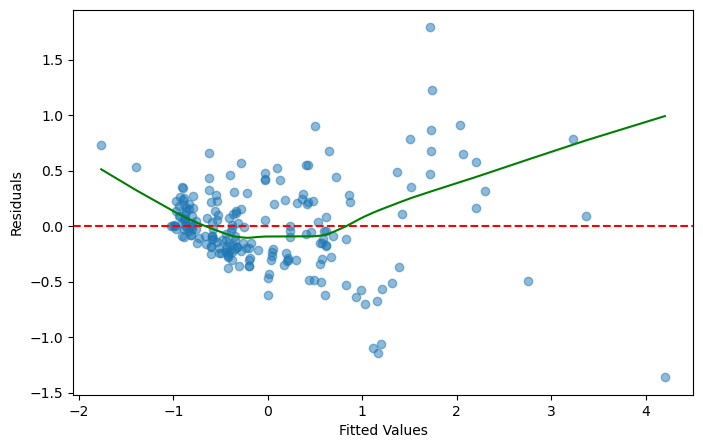

In [34]:
fitted_values = model.fittedvalues
residuals = model.resid

# Plotting Residuals vs Fitted with a Lowess line
plt.figure(figsize=(8, 5))
plt.scatter(fitted_values, residuals, alpha=0.5, label='Residuals')
plt.axhline(0, color='red', linestyle='--')

# Adding a lowess smooth line
lowess = sm.nonparametric.lowess(residuals, fitted_values)
plt.plot(lowess[:, 0], lowess[:, 1], color='green', label='Lowess line')

plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

#### Homoscedasticity --- ncv Test

In [145]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [146]:
_, pvalue, _, _ = het_breuschpagan(residuals, X)
print("P-value of the Breusch-Pagan test:", pvalue)
#Since P-value is small, so Homoscedasticity ncvTest passed

P-value of the Breusch-Pagan test: 6.562469593518851e-11


#### Multicollearity

In [147]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [148]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
vif_data
#from vif, several features are greater than 5. So we need to use the other stargeties like Ridge Regression or PCA

,feature,VIF
0,const,1.000000
1,wheelbase,7.322953
2,carlength,9.538981
3,carwidth,5.554251
4,carheight,2.220235
5,curbweight,16.374447
6,enginesize,6.648785
7,boreratio,2.151887
8,stroke,1.174582
9,compressionratio,2.177795


### Unusual observations --- residuals, high leverage points, High cooks distance

In [149]:
influence = model.get_influence()
summary_frame = influence.summary_frame()
#print(summary_frame)
print(summary_frame[['cooks_d', 'standard_resid', 'hat_diag']])

      cooks_d  standard_resid  hat_diag
0    0.000136        0.136356  0.092825
1    0.009235        1.124095  0.092825
2    0.001932       -0.414062  0.136248
3    0.001101        0.758762  0.026082
4    0.000748        0.532957  0.035560
..        ...             ...       ...
200  0.000992       -0.460057  0.061559
201  0.000497       -0.296144  0.073572
202  0.004425       -0.944715  0.064905
203  0.005729        0.757599  0.122602
204  0.005959        1.132390  0.061081

[203 rows x 3 columns]


In [150]:
# Criteria to identify potential outliers
# Studentized residuals greater than 2 or less than -2
# High leverage points (greater than 2*(k+1)/n where k is the number of predictors and n is the number of observations)
# High Cook's distance (commonly used threshold is 4/(n-k-1))
k = len(predictor)
outliers = summary_frame.loc[(summary_frame['standard_resid'].abs() > 2) |
                             (summary_frame['hat_diag'] > 2*(k+1)/100) |
                             (summary_frame['cooks_d'] > 4/(df.shape[0]-k-1))]

print("Potential Outliers:")
print(outliers)

Potential Outliers:
     dfb_const  dfb_wheelbase  dfb_carlength  dfb_carwidth  dfb_carheight  \
8     0.137163      -0.216980       0.130595      0.469460       0.119632   
14    0.169053      -0.067447       0.178685     -0.111448       0.013061   
16    0.349380      -0.123185       0.504767     -0.409423      -0.078804   
17    0.170463       0.047826      -0.023377      0.197235       0.161898   
18    0.149009       0.123307      -0.159463     -0.199267       0.052457   
30    0.117332      -0.217973      -0.024583      0.245226       0.011948   
48    0.119931       0.149882      -0.037074     -0.225949      -0.186934   
49   -0.331473       0.019209      -0.276607      0.110834       0.648945   
57    0.128418       0.059952      -0.051860      0.025639      -0.220470   
70    0.150186       0.097937      -0.014843      0.102653      -0.135722   
72    0.147388      -0.557929      -0.147103      0.456408       0.030683   
74    0.173039      -0.005320      -0.072902      0.3085

In [151]:
#remove outliers
outlier_criteria = ((summary_frame['standard_resid'].abs() > 2) |
                             (summary_frame['hat_diag'] > 2*(k+1)/100) |
                             (summary_frame['cooks_d'] > 4/(df.shape[0]-k-1)))
outlier_indices = summary_frame.loc[outlier_criteria].index
outlier_indices

Index([  8,  14,  16,  17,  18,  30,  48,  49,  57,  70,  72,  74, 101, 102,
       103, 126, 127, 128, 129, 134, 155],
      dtype='int64')

In [152]:
df.reset_index(drop=True, inplace=True)
df = df.drop(index=outlier_indices, axis = 0)
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,3,1,0,2,0,2,0,-1.691128,-0.434186,-0.850551,...,0.530087,-1.911707,-0.289225,0.166973,-0.267799,-0.636887,-0.537054,0.018531,1,74
1,3,1,0,2,0,2,0,-1.691128,-0.434186,-0.850551,...,0.530087,-1.911707,-0.289225,0.166973,-0.267799,-0.636887,-0.537054,0.395285,1,118
2,1,1,0,2,2,2,0,-0.711886,-0.239187,-0.197236,...,-2.396250,0.679406,-0.289225,1.254664,-0.267799,-0.943257,-0.682417,0.395285,1,28
3,2,1,0,4,3,1,0,0.167772,0.199562,0.129422,...,-0.507095,0.449813,-0.038016,-0.060683,0.779661,-0.177332,-0.100966,0.075576,2,0
4,2,1,0,4,3,0,0,0.101383,0.199562,0.222752,...,-0.507095,0.449813,-0.540435,0.268153,0.779661,-1.096442,-1.263867,0.514392,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,-1,1,0,4,3,2,0,1.711323,1.190810,1.389386,...,1.678397,-0.370159,-0.163620,0.242858,0.570169,-0.330517,-0.391691,0.438539,23,5
199,-1,1,1,4,3,2,0,1.711323,1.190810,1.342721,...,1.678397,-0.370159,-0.364588,1.406435,0.360677,-0.943257,-0.827779,0.714366,23,4
200,-1,1,0,4,3,2,0,1.711323,1.190810,1.389386,...,0.937552,-1.288528,-0.339467,0.748761,0.779661,-1.096442,-1.118504,1.020283,23,6
201,-1,0,1,4,3,2,0,1.711323,1.190810,1.389386,...,-1.173856,0.449813,3.227710,0.040497,-0.686783,0.129038,-0.537054,1.143778,23,8


### PowerTransformation: no need because this dataset is normally distributed, Linearly and homoscedasticity

### Generate basic linear regression model
--- because previous model is a collection of all numeric variables to determine if this model can be linearly regression

In [153]:
predictors = []
for column in df.columns:
    if (column != "price"):
        predictors.append(column)
X = df[predictors]
y = df["price"]

In [154]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     59.17
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           2.77e-66
Time:                        12:06:56   Log-Likelihood:                 6.9226
No. Observations:                 182   AIC:                             36.15
Df Residuals:                     157   BIC:                             116.3
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.7681      0.616  

### Handle with multicollinearity issue method1 --- use Lasso Regression because of total number of features 

#### First Implementation

In [155]:
from sklearn.linear_model import Ridge, Lasso

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [157]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.0991657206855322
R^2 Score: 0.8015074174278387


In [158]:
coef = pd.Series(lasso.coef_, index = X.columns)
print(coef)

const               0.000000
symboling          -0.000000
fueltype           -0.000000
aspiration          0.000000
doornumber          0.000000
carbody             0.000000
drivewheel          0.000000
enginelocation      0.000000
wheelbase           0.025178
carlength           0.000000
carwidth            0.093542
carheight           0.000000
curbweight          0.298355
enginetype          0.000000
cylindernumber      0.000000
enginesize          0.209710
fuelsystem          0.036696
boreratio           0.000000
stroke             -0.000000
compressionratio    0.000000
horsepower          0.005874
peakrpm             0.000000
citympg            -0.000000
highwaympg         -0.000000
Company            -0.011769
Model              -0.000847
dtype: float64


#### parameter adjustment

In [159]:
alpha_lst = []
max_iter_lst = []
tol_lst = []
mse_lst = []
r2_lst = [] 

In [160]:
count = 1
for alpha_temp in (list(np.arange(0.1, 5.1, 0.1))):
    for max_iter_temp in range(100, 10000, 100):
        for tol_temp in (list(np.arange(0.01, 1, 0.01))):
            if (count % 10000 == 0):
                print(count)
            count += 1
            lasso = Lasso(alpha=alpha_temp, max_iter = max_iter_temp, tol = tol_temp)
            lasso.fit(X_train, y_train)
            y_pred = lasso.predict(X_test)
            mse_lst.append(mean_squared_error(y_test, y_pred))
            r2_lst.append(r2_score(y_test, y_pred))
            alpha_lst.append(alpha_temp)
            max_iter_lst.append(max_iter_temp)
            tol_lst.append(tol_temp)           

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000


In [161]:
Lasso_df = pd.DataFrame({
    "alpha" : alpha_lst, 
    "max_iter" : max_iter_lst,
    "tol" : tol_lst, 
    "mse" : mse_lst, 
    "r2" : r2_lst
})
Lasso_df = Lasso_df.sort_values(by=['mse', 'r2'], ascending=[True, False])
Lasso_df.to_csv("Lasso_df.csv")
Lasso_df
#alpha = 0.1, max_iter = 100, tol = 0.01 -> mse = 0.099421, r2 = 0.800997

,alpha,max_iter,tol,mse,r2
0,0.1,100,0.01,0.099421,0.800997
99,0.1,200,0.01,0.099421,0.800997
198,0.1,300,0.01,0.099421,0.800997
297,0.1,400,0.01,0.099421,0.800997
396,0.1,500,0.01,0.099421,0.800997
...,...,...,...,...,...
490045,5.0,9900,0.95,0.503915,-0.008649
490046,5.0,9900,0.96,0.503915,-0.008649
490047,5.0,9900,0.97,0.503915,-0.008649
490048,5.0,9900,0.98,0.503915,-0.008649


#### feature selection based on the best Lasso regression

In [162]:
lasso = Lasso(alpha=0.1, max_iter = 100, tol = 0.01)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
coef = pd.Series(lasso.coef_, index = X.columns)
print(coef)

const               0.000000
symboling          -0.000000
fueltype           -0.000000
aspiration          0.000000
doornumber          0.000000
carbody             0.000000
drivewheel          0.000000
enginelocation      0.000000
wheelbase           0.010095
carlength           0.000000
carwidth            0.094872
carheight           0.000000
curbweight          0.316600
enginetype          0.000000
cylindernumber      0.000000
enginesize          0.210843
fuelsystem          0.035441
boreratio           0.000000
stroke             -0.000000
compressionratio    0.000000
horsepower          0.000000
peakrpm             0.000000
citympg            -0.000000
highwaympg         -0.000000
Company            -0.011620
Model              -0.000881
dtype: float64


In [163]:
#based on Lasso coef, I select features with positive Lasso coef and reject 0 or negative features
predictors = coef[coef > 0].index.tolist()
x_train_new = X_train[predictors]
x_test_new = X_test[predictors]

In [164]:
multivariable_linear_model = LinearRegression()
multivariable_linear_model.fit(x_train_new, y_train)
y_pred = multivariable_linear_model.predict(x_test_new)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.11270846758827811


In [165]:
print("Coefficients of the Linear Regression Model:")
print(pd.Series(multivariable_linear_model.coef_, index=predictors))
print("intercept: ")
print (multivariable_linear_model.intercept_)

Coefficients of the Linear Regression Model:
wheelbase     0.007559
carwidth      0.163034
curbweight    0.304283
enginesize    0.381289
fuelsystem    0.005185
dtype: float64
intercept: 
-0.06580978126963455


#### find Re-scale coefficient
$$
X_{\text{normalized}} = \frac{X - \mu}{\sigma}
$$

$$
\beta_{\text{original}} = \frac{\beta_{\text{normalized}}}{\sigma}
$$

$$
\text{intercept}_{\text{original}} = \text{intercept}_{\text{normalized}} - \sum \left( \frac{\beta_{\text{normalized}} \times \mu}{\sigma} \right)
$$

In [166]:
sd_numeric

{'symboling': 1.2473842308615413,
 'wheelbase': 6.039964329133511,
 'carlength': 12.338152172206865,
 'carwidth': 2.148215657844414,
 'carheight': 2.45406763037383,
 'curbweight': 521.221483959717,
 'enginesize': 41.77352698711094,
 'boreratio': 0.2706294901311469,
 'stroke': 0.30564201911262473,
 'compressionratio': 3.990580084440128,
 'horsepower': 39.63101344587727,
 'peakrpm': 478.525200850078,
 'citympg': 6.544196909720178,
 'highwaympg': 6.896355774419603,
 'price': 7995.739860638617}

In [167]:
normalized_coef = pd.Series(multivariable_linear_model.coef_, index=predictors)
coef_lst = {}
for column in normalized_coef.index:
    if(column not in sd_numeric.keys()):
        coef_lst[column] = normalized_coef[column]
    else:
        coef_lst[column] = normalized_coef[column] / sd_numeric[column]
coef_lst

{'wheelbase': 0.0012514708337259465,
 'carwidth': 0.0758927468714166,
 'curbweight': 0.0005837888106808867,
 'enginesize': 0.009127524761304047,
 'fuelsystem': 0.00518460642337204}

In [168]:
#calculate intercept:
intercept = multivariable_linear_model.intercept_
for column in normalized_coef.index:
    if (column not in sd_numeric.keys()):
        continue
    else:
        intercept -= normalized_coef[column] * mean_numeric[column] / sd_numeric[column]
intercept

-7.847583201076029

### Handle with multicollinearity issue method2 --- use PCA on numeric features

#### separate dataset with numeric and category features

In [169]:
df_numeric = df.select_dtypes(include = ["int64", "float64"])
df_numeric.columns
#df = df.drop(["CarName", "car_ID"], axis = 1)
df_numeric = df_numeric.drop(["symboling", "doornumber", "price"], axis = 1)
df_numeric

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,-1.691128,-0.434186,-0.850551,-2.014299,-0.023231,0.068447,0.530087,-1.911707,-0.289225,0.166973,-0.267799,-0.636887,-0.537054
1,-1.691128,-0.434186,-0.850551,-2.014299,-0.023231,0.068447,0.530087,-1.911707,-0.289225,0.166973,-0.267799,-0.636887,-0.537054
2,-0.711886,-0.239187,-0.197236,-0.543720,0.505680,0.596398,-2.396250,0.679406,-0.289225,1.254664,-0.267799,-0.943257,-0.682417
3,0.167772,0.199562,0.129422,0.232419,-0.429050,-0.435507,-0.507095,0.449813,-0.038016,-0.060683,0.779661,-0.177332,-0.100966
4,0.101383,0.199562,0.222752,0.232419,0.507603,0.212434,-0.507095,0.449813,-0.540435,0.268153,0.779661,-1.096442,-1.263867
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,1.711323,1.190810,1.389386,0.722612,0.753787,0.332423,1.678397,-0.370159,-0.163620,0.242858,0.570169,-0.330517,-0.391691
199,1.711323,1.190810,1.342721,0.722612,0.940349,0.332423,1.678397,-0.370159,-0.364588,1.406435,0.360677,-0.943257,-0.827779
200,1.711323,1.190810,1.389386,0.722612,0.869186,1.100352,0.937552,-1.288528,-0.339467,0.748761,0.779661,-1.096442,-1.118504
201,1.711323,1.190810,1.389386,0.722612,1.263465,0.428414,-1.173856,0.449813,3.227710,0.040497,-0.686783,0.129038,-0.537054


In [170]:
df_category = df.drop(columns = df_numeric.columns)
df_category = df_category.drop(["price"], axis = 1)
df_category

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,Company,Model
0,3,1,0,2,0,2,0,0,2,5,1,74
1,3,1,0,2,0,2,0,0,2,5,1,118
2,1,1,0,2,2,2,0,5,3,5,1,28
3,2,1,0,4,3,1,0,3,2,5,2,0
4,2,1,0,4,3,0,0,3,1,5,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
198,-1,1,0,4,3,2,0,3,2,5,23,5
199,-1,1,1,4,3,2,0,3,2,5,23,4
200,-1,1,0,4,3,2,0,5,3,5,23,6
201,-1,0,1,4,3,2,0,3,3,3,23,8


#### Scree plot for original numeric features

In [171]:
from sklearn.decomposition import PCA

In [172]:
pca = PCA()
pca.fit(df_numeric)

PCA()

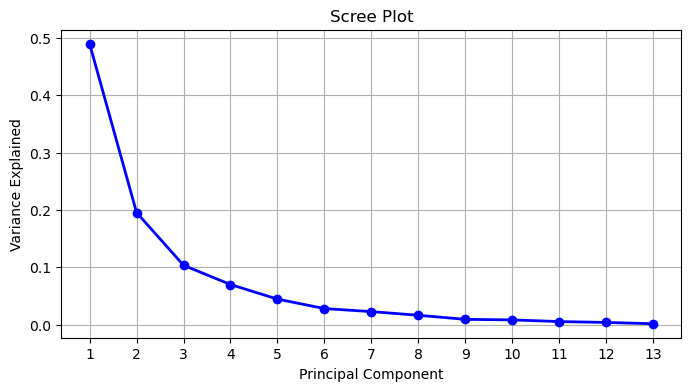

In [173]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))  # Ensure x-axis labels are integers
plt.grid(True)
plt.show()

#### n_factor selection

In [174]:
#here my optimal n_factors = 2, 3, 4, 5, 6
pca = PCA(n_components=2)  # for example, reduce to 2 dimensions
principal_components = pca.fit_transform(df_numeric)


pca_df2 = pd.DataFrame(data=principal_components, columns=["PCA1", "PCA2"])

#evaluate PCA
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
eigenvalues = pca.explained_variance_
loadings = pca.components_

pca_summary_df = pd.DataFrame({
    'Principal Component': np.arange(1, len(explained_variance_ratio) + 1),
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Explained Variance': cumulative_variance,
    'Eigenvalues': eigenvalues
})

print(pca_summary_df)

   Principal Component  Explained Variance Ratio  \
0                    1                  0.489695   
1                    2                  0.195510   

   Cumulative Explained Variance  Eigenvalues  
0                       0.489695     5.467994  
1                       0.685205     2.183085  


In [175]:
pca = PCA(n_components=3)  # for example, reduce to 2 dimensions
principal_components = pca.fit_transform(df_numeric)


pca_df3 = pd.DataFrame(data=principal_components, columns=["PCA1", "PCA2", "PCA3"])

#evaluate PCA
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
eigenvalues = pca.explained_variance_
loadings = pca.components_

pca_summary_df = pd.DataFrame({
    'Principal Component': np.arange(1, len(explained_variance_ratio) + 1),
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Explained Variance': cumulative_variance,
    'Eigenvalues': eigenvalues
})

print(pca_summary_df)

   Principal Component  Explained Variance Ratio  \
0                    1                  0.489695   
1                    2                  0.195510   
2                    3                  0.103627   

   Cumulative Explained Variance  Eigenvalues  
0                       0.489695     5.467994  
1                       0.685205     2.183085  
2                       0.788831     1.157106  


In [176]:
pca = PCA(n_components=4)  # for example, reduce to 2 dimensions
principal_components = pca.fit_transform(df_numeric)


pca_df4 = pd.DataFrame(data=principal_components, columns=["PCA1", "PCA2", "PCA3", "PCA4"])

#evaluate PCA
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
eigenvalues = pca.explained_variance_
loadings = pca.components_

pca_summary_df = pd.DataFrame({
    'Principal Component': np.arange(1, len(explained_variance_ratio) + 1),
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Explained Variance': cumulative_variance,
    'Eigenvalues': eigenvalues
})

print(pca_summary_df)

   Principal Component  Explained Variance Ratio  \
0                    1                  0.489695   
1                    2                  0.195510   
2                    3                  0.103627   
3                    4                  0.070013   

   Cumulative Explained Variance  Eigenvalues  
0                       0.489695     5.467994  
1                       0.685205     2.183085  
2                       0.788831     1.157106  
3                       0.858844     0.781772  


In [177]:
pca = PCA(n_components=5)  # for example, reduce to 2 dimensions
principal_components = pca.fit_transform(df_numeric)


pca_df5 = pd.DataFrame(data=principal_components, columns=["PCA1", "PCA2", "PCA3", "PCA4", "PCA5"])

#evaluate PCA
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
eigenvalues = pca.explained_variance_
loadings = pca.components_

pca_summary_df = pd.DataFrame({
    'Principal Component': np.arange(1, len(explained_variance_ratio) + 1),
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Explained Variance': cumulative_variance,
    'Eigenvalues': eigenvalues
})

print(pca_summary_df)

   Principal Component  Explained Variance Ratio  \
0                    1                  0.489695   
1                    2                  0.195510   
2                    3                  0.103627   
3                    4                  0.070013   
4                    5                  0.044669   

   Cumulative Explained Variance  Eigenvalues  
0                       0.489695     5.467994  
1                       0.685205     2.183085  
2                       0.788831     1.157106  
3                       0.858844     0.781772  
4                       0.903513     0.498778  


In [178]:
pca = PCA(n_components=6)  # for example, reduce to 2 dimensions
principal_components = pca.fit_transform(df_numeric)


pca_df6 = pd.DataFrame(data=principal_components, columns=["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6"])

#evaluate PCA
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
eigenvalues = pca.explained_variance_
loadings = pca.components_

pca_summary_df = pd.DataFrame({
    'Principal Component': np.arange(1, len(explained_variance_ratio) + 1),
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Explained Variance': cumulative_variance,
    'Eigenvalues': eigenvalues
})

print(pca_summary_df)

   Principal Component  Explained Variance Ratio  \
0                    1                  0.489695   
1                    2                  0.195510   
2                    3                  0.103627   
3                    4                  0.070013   
4                    5                  0.044669   
5                    6                  0.028146   

   Cumulative Explained Variance  Eigenvalues  
0                       0.489695     5.467994  
1                       0.685205     2.183085  
2                       0.788831     1.157106  
3                       0.858844     0.781772  
4                       0.903513     0.498778  
5                       0.931659     0.314280  


#### get optimal n_factor value

In [179]:
#n = 3 is kneel point but it captures 78.8% of variance. 
#n = 4 captures 85% of variance,
#Based on cost - effective, I pick n = 4

In [180]:
pca = PCA(n_components=4)  # for example, reduce to 2 dimensions
principal_components = pca.fit_transform(df_numeric)
pca_df4 = pd.DataFrame(data=principal_components, columns=["PCA1", "PCA2", "PCA3", "PCA4"])
pca_df4

,PCA1,PCA2,PCA3,PCA4
0,-0.668412,-1.842407,0.670735,-2.504899
1,-0.668412,-1.842407,0.670735,-2.504899
2,0.214784,-1.282770,-1.514500,0.336919
3,-0.003825,-0.362914,-0.209192,1.048154
4,1.241961,-1.407285,-0.287264,0.939690
...,...,...,...,...
177,2.952690,-0.020441,0.883456,0.534812
178,3.646023,-0.693389,0.779248,0.328401
179,3.483450,-0.873482,1.327461,0.607621
180,2.475662,2.815076,-1.171108,1.087268


In [181]:
weight = pd.DataFrame(pca.components_, columns = df_numeric.columns)
weight

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0.346970,0.372845,0.339421,0.181498,0.371474,0.280565,0.313252,0.053226,0.038367,0.256093,-0.135296,-0.299639,-0.315654
1,0.194378,0.092060,0.055527,0.363365,0.021516,-0.022906,-0.027307,0.053954,0.584217,-0.267218,-0.442851,0.339810,0.299461
2,0.096579,0.065293,-0.087461,0.424835,-0.073888,-0.207857,0.172671,-0.793196,-0.258504,-0.148774,0.003257,-0.018836,-0.036221
3,0.245072,0.139368,0.102580,0.495888,-0.007350,-0.134816,-0.425098,0.261829,-0.026010,-0.061944,0.626084,0.008050,-0.006166


#### combine pca column with category features and target features

In [182]:
df_pca = pd.concat([pca_df4.reset_index(drop=True), df_category.reset_index(drop=True), df["price"].reset_index(drop=True)], axis=1)
df_pca

,PCA1,PCA2,PCA3,PCA4,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,Company,Model,price
0,-0.668412,-1.842407,0.670735,-2.504899,3,1,0,2,0,2,0,0,2,5,1,74,0.018531
1,-0.668412,-1.842407,0.670735,-2.504899,3,1,0,2,0,2,0,0,2,5,1,118,0.395285
2,0.214784,-1.282770,-1.514500,0.336919,1,1,0,2,2,2,0,5,3,5,1,28,0.395285
3,-0.003825,-0.362914,-0.209192,1.048154,2,1,0,4,3,1,0,3,2,5,2,0,0.075576
4,1.241961,-1.407285,-0.287264,0.939690,2,1,0,4,3,0,0,3,1,5,2,1,0.514392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2.952690,-0.020441,0.883456,0.534812,-1,1,0,4,3,2,0,3,2,5,23,5,0.438539
178,3.646023,-0.693389,0.779248,0.328401,-1,1,1,4,3,2,0,3,2,5,23,4,0.714366
179,3.483450,-0.873482,1.327461,0.607621,-1,1,0,4,3,2,0,5,3,5,23,6,1.020283
180,2.475662,2.815076,-1.171108,1.087268,-1,0,1,4,3,2,0,3,3,3,23,8,1.143778


#### run Lasso regularlization from feature selection

In [183]:
predictors = []
for column in df_pca.columns:
    if (column != "price"):
        predictors.append(column)
X = df_pca[predictors]
y = df_pca["price"]

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [185]:
alpha_lst = []
max_iter_lst = []
tol_lst = []
mse_lst = []
r2_lst = [] 

In [186]:
count = 1
for alpha_temp in (list(np.arange(0.1, 5.1, 0.1))):
    for max_iter_temp in range(100, 10000, 100):
        for tol_temp in (list(np.arange(0.01, 1, 0.01))):
            if (count % 10000 == 0):
                print(count)
            count += 1
            lasso = Lasso(alpha=alpha_temp, max_iter = max_iter_temp, tol = tol_temp)
            lasso.fit(X_train, y_train)
            y_pred = lasso.predict(X_test)
            mse_lst.append(mean_squared_error(y_test, y_pred))
            r2_lst.append(r2_score(y_test, y_pred))
            alpha_lst.append(alpha_temp)
            max_iter_lst.append(max_iter_temp)
            tol_lst.append(tol_temp)           

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000


In [187]:
Lasso_df_after_pca = pd.DataFrame({
    "alpha" : alpha_lst, 
    "max_iter" : max_iter_lst,
    "tol" : tol_lst, 
    "mse" : mse_lst, 
    "r2" : r2_lst
})
Lasso_df_after_pca = Lasso_df_after_pca.sort_values(by=['mse', 'r2'], ascending=[True, False])
Lasso_df_after_pca.to_csv("Lasso_df_after_pca.csv")
Lasso_df_after_pca
#alpha = 0.1, max_iter = 100, tol = 0.1 -> mse = 0.12, r2 = 0.742516

,alpha,max_iter,tol,mse,r2
0,0.1,100,0.01,0.128637,0.742516
99,0.1,200,0.01,0.128637,0.742516
198,0.1,300,0.01,0.128637,0.742516
297,0.1,400,0.01,0.128637,0.742516
396,0.1,500,0.01,0.128637,0.742516
...,...,...,...,...,...
490045,5.0,9900,0.95,0.503915,-0.008649
490046,5.0,9900,0.96,0.503915,-0.008649
490047,5.0,9900,0.97,0.503915,-0.008649
490048,5.0,9900,0.98,0.503915,-0.008649


#### feature selection based on best Lasso model

In [188]:
lasso = Lasso(alpha=0.1, max_iter = 100, tol = 0.01)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
coef = pd.Series(lasso.coef_, index = X.columns)
print(coef)

PCA1              0.264740
PCA2             -0.000000
PCA3             -0.000000
PCA4             -0.000000
symboling         0.000000
fueltype         -0.000000
aspiration        0.000000
doornumber       -0.000000
carbody          -0.000000
drivewheel        0.000000
enginelocation    0.000000
enginetype        0.000000
cylindernumber   -0.000000
fuelsystem        0.000629
Company          -0.015162
Model            -0.000000
dtype: float64


In [189]:
#based on Lasso coef, I select features with positive Lasso coef and reject 0 or negative features
predictors = coef[coef > 0].index.tolist()
x_train_new = X_train[predictors]
x_test_new = X_test[predictors]

In [190]:
multivariable_linear_model_pca = LinearRegression()
multivariable_linear_model_pca.fit(x_train_new, y_train)
y_pred = multivariable_linear_model_pca.predict(x_test_new)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1637141498873885


In [191]:
print("Coefficients of the Linear Regression Model:")
print(pd.Series(multivariable_linear_model_pca.coef_, index=predictors))
print("intercept: ")
print (multivariable_linear_model_pca.intercept_)

Coefficients of the Linear Regression Model:
PCA1          0.274638
fuelsystem    0.006599
dtype: float64
intercept: 
-0.16537733126361487


#### feature selection based on stepwise function --- forward selection

In [192]:
df_pca

,PCA1,PCA2,PCA3,PCA4,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,Company,Model,price
0,-0.668412,-1.842407,0.670735,-2.504899,3,1,0,2,0,2,0,0,2,5,1,74,0.018531
1,-0.668412,-1.842407,0.670735,-2.504899,3,1,0,2,0,2,0,0,2,5,1,118,0.395285
2,0.214784,-1.282770,-1.514500,0.336919,1,1,0,2,2,2,0,5,3,5,1,28,0.395285
3,-0.003825,-0.362914,-0.209192,1.048154,2,1,0,4,3,1,0,3,2,5,2,0,0.075576
4,1.241961,-1.407285,-0.287264,0.939690,2,1,0,4,3,0,0,3,1,5,2,1,0.514392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2.952690,-0.020441,0.883456,0.534812,-1,1,0,4,3,2,0,3,2,5,23,5,0.438539
178,3.646023,-0.693389,0.779248,0.328401,-1,1,1,4,3,2,0,3,2,5,23,4,0.714366
179,3.483450,-0.873482,1.327461,0.607621,-1,1,0,4,3,2,0,5,3,5,23,6,1.020283
180,2.475662,2.815076,-1.171108,1.087268,-1,0,1,4,3,2,0,3,3,3,23,8,1.143778


In [193]:
def forward_selection_with_metrics(Y, X, significance_level=0.05):
    initial_features = X.columns.tolist()
    best_features = []
    model_metrics = []
    
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(Y, sm.add_constant(X[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        
        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
            # Recalculate model with new best features
            final_model = sm.OLS(Y, sm.add_constant(X[best_features])).fit()
            model_metrics.append({
                'Features': best_features.copy(),
                'AIC': final_model.aic,
                'BIC': final_model.bic,
                'R_squared': final_model.rsquared
            })
        else:
            break

    return model_metrics

# Perform forward selection and print out the AIC, BIC, and R^2 for each step
Y = df_pca["price"]
X = df_pca.drop(columns = ["price"])
metrics = forward_selection_with_metrics(Y, X)
for step in metrics:
    print(f"Features: {step['Features']}, AIC: {step['AIC']}, BIC: {step['BIC']}, R^2: {step['R_squared']}")

Features: ['PCA1'], AIC: 165.8866828769909, BIC: 172.2946962511445, R^2: 0.7385614982686476
Features: ['PCA1', 'Company'], AIC: 135.7039204040123, BIC: 145.3159404652427, R^2: 0.7809345123267328
Features: ['PCA1', 'Company', 'drivewheel'], AIC: 129.39303729230272, BIC: 142.20906404060992, R^2: 0.7907129985466765
Features: ['PCA1', 'Company', 'drivewheel', 'carbody'], AIC: 127.0238654609833, BIC: 143.04389889636727, R^2: 0.7956774068055914


#### feature selection based on stepwise function --- backwards selection

In [194]:
def backward_elimination_with_metrics(Y, X, significance_level=0.05):
    features = X.columns.tolist()
    metrics_history = []

    while len(features) > 0:
        X_with_const = sm.add_constant(X[features])
        model = sm.OLS(Y, X_with_const).fit()
        p_values = model.pvalues.iloc[1:]  # Exclude the intercept p-value

        # Record the metrics
        metrics_history.append({
            'Features': features.copy(),
            'AIC': model.aic,
            'BIC': model.bic,
            'R_squared': model.rsquared
        })

        max_p_value = p_values.max()
        if max_p_value >= significance_level:
            feature_to_remove = p_values.idxmax()
            features.remove(feature_to_remove)
        else:
            break

    return metrics_history

# Perform backward elimination and record the metrics
metrics = backward_elimination_with_metrics(Y, X)
for step in metrics:
    print(f"Step with Features: {step['Features']}\nAIC: {step['AIC']}, BIC: {step['BIC']}, R^2: {step['R_squared']}\n")

Step with Features: ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'Company', 'Model']
AIC: 122.78929556040134, BIC: 174.05340255363006, R^2: 0.8231053963580187

Step with Features: ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'Company', 'Model']
AIC: 121.31891462047656, BIC: 169.37901492662849, R^2: 0.8225898842700046

Step with Features: ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'Company', 'Model']
AIC: 119.72536600461507, BIC: 164.5814596236902, R^2: 0.8221932405046237

Step with Features: ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'Company', 'Model']
AI

#### feature selection based on stepwise function --- stepwise selection

In [195]:
def stepwise_selection_with_metrics(Y, X, SL_in=0.05, SL_out=0.05):
    initial_features = X.columns.tolist()
    best_features = []
    metrics_history = []

    while len(initial_features) > 0:
        changed = False
        
        # Forward Step
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(Y, sm.add_constant(X[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < SL_in:
            best_features.append(new_pval.idxmin())
            changed = True
        
        # Backward Step
        if changed:
            model = sm.OLS(Y, sm.add_constant(X[best_features])).fit()
            # Use all coefs except intercept
            p_values = model.pvalues.iloc[1:]
            max_p_value = p_values.max()
            if max_p_value > SL_out:
                feature_to_remove = p_values.idxmax()
                best_features.remove(feature_to_remove)

        # Update Metrics after each addition or removal
        model = sm.OLS(Y, sm.add_constant(X[best_features])).fit()
        metrics_history.append({
            'Features': best_features.copy(),
            'AIC': model.aic,
            'BIC': model.bic,
            'R_squared': model.rsquared
        })

        if not changed:
            break

    return metrics_history

# Perform stepwise selection and record the metrics
metrics = stepwise_selection_with_metrics(Y, X)
for step in metrics:
    print(f"Step with Features: {step['Features']}\nAIC: {step['AIC']}, BIC: {step['BIC']}, R^2: {step['R_squared']}\n")

Step with Features: ['PCA1']
AIC: 165.8866828769909, BIC: 172.2946962511445, R^2: 0.7385614982686476

Step with Features: ['PCA1', 'Company']
AIC: 135.7039204040123, BIC: 145.3159404652427, R^2: 0.7809345123267328

Step with Features: ['PCA1', 'Company', 'drivewheel']
AIC: 129.39303729230272, BIC: 142.20906404060992, R^2: 0.7907129985466765

Step with Features: ['PCA1', 'Company', 'drivewheel', 'carbody']
AIC: 127.0238654609833, BIC: 143.04389889636727, R^2: 0.7956774068055914

Step with Features: ['PCA1', 'Company', 'drivewheel', 'carbody']
AIC: 127.0238654609833, BIC: 143.04389889636727, R^2: 0.7956774068055914



#### final model based on feature selection above

In [196]:
forward_selection_lst = ['PCA1', 'Company', 'drivewheel', 'carbody']
backward_selection_lst = ['PCA1', 'PCA2', 'PCA4', 'fueltype', 'doornumber', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'Company', 'Model']
stepwise_selection_lst = ['PCA1', 'Company', 'drivewheel', 'carbody']

In [197]:
#compare mse for each model
X = df_pca[forward_selection_lst]
y = df_pca["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
multivariable_linear_model = LinearRegression()
multivariable_linear_model.fit(X_train, y_train)
y_pred = multivariable_linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for forward selection & stepwise selection:", mse)

Mean Squared Error for forward selection & stepwise selection: 0.11381184489614324


In [198]:
#compare mse for each model
X = df_pca[backward_selection_lst]
y = df_pca["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
multivariable_linear_model = LinearRegression()
multivariable_linear_model.fit(X_train, y_train)
y_pred = multivariable_linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for backward selection:", mse)

Mean Squared Error for backward selection: 0.11760562466046905


### Handle with multicollinearity issue method3 --- use forwards/backwards/stepwise for feature selection

#### forward selection

In [199]:
Y = df["price"]
X = df.drop(columns = ["price"])
metrics = forward_selection_with_metrics(Y, X)
for step in metrics:
    print(f"Features: {step['Features']}, AIC: {step['AIC']}, BIC: {step['BIC']}, R^2: {step['R_squared']}")

Features: ['curbweight'], AIC: 153.09992024922065, BIC: 159.50793362337424, R^2: 0.7562989806794579
Features: ['curbweight', 'enginesize'], AIC: 111.14006436985176, BIC: 120.75208443108214, R^2: 0.8085925362837226
Features: ['curbweight', 'enginesize', 'peakrpm'], AIC: 95.93470515446535, BIC: 108.75073190277253, R^2: 0.8258582656445467
Features: ['curbweight', 'enginesize', 'peakrpm', 'stroke'], AIC: 84.78887214068106, BIC: 100.80890557606504, R^2: 0.8379929778053595
Features: ['curbweight', 'enginesize', 'peakrpm', 'stroke', 'compressionratio'], AIC: 72.65471366824858, BIC: 91.87875379070934, R^2: 0.8500983413956086
Features: ['curbweight', 'enginesize', 'peakrpm', 'stroke', 'compressionratio', 'Company'], AIC: 61.09507001883628, BIC: 83.52311682837384, R^2: 0.8608606521816417
Features: ['curbweight', 'enginesize', 'peakrpm', 'stroke', 'compressionratio', 'Company', 'citympg'], AIC: 54.43448289648393, BIC: 80.06653639309829, R^2: 0.8673266237983478
Features: ['curbweight', 'enginesize

#### backward selection

In [200]:
metrics = backward_elimination_with_metrics(Y, X)
for step in metrics:
    print(f"Step with Features: {step['Features']}\nAIC: {step['AIC']}, BIC: {step['BIC']}, R^2: {step['R_squared']}\n")

Step with Features: ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'Company', 'Model']
AIC: 36.15483130439782, BIC: 116.2549984813177, R^2: 0.9004520480919567

Step with Features: ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'Company', 'Model']
AIC: 34.16352784345918, BIC: 111.05968833330226, R^2: 0.9004472912604399

Step with Features: ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'enginelocation', 'wheelbase', 'carlength', 'carheight', 'curbweight', '

#### stepwise selection

In [201]:
metrics = stepwise_selection_with_metrics(Y, X)
for step in metrics:
    print(f"Step with Features: {step['Features']}\nAIC: {step['AIC']}, BIC: {step['BIC']}, R^2: {step['R_squared']}\n")

Step with Features: ['curbweight']
AIC: 153.09992024922065, BIC: 159.50793362337424, R^2: 0.7562989806794579

Step with Features: ['curbweight', 'enginesize']
AIC: 111.14006436985176, BIC: 120.75208443108214, R^2: 0.8085925362837226

Step with Features: ['curbweight', 'enginesize', 'peakrpm']
AIC: 95.93470515446535, BIC: 108.75073190277253, R^2: 0.8258582656445467

Step with Features: ['curbweight', 'enginesize', 'peakrpm', 'stroke']
AIC: 84.78887214068106, BIC: 100.80890557606504, R^2: 0.8379929778053595

Step with Features: ['curbweight', 'enginesize', 'peakrpm', 'stroke', 'compressionratio']
AIC: 72.65471366824858, BIC: 91.87875379070934, R^2: 0.8500983413956086

Step with Features: ['curbweight', 'enginesize', 'peakrpm', 'stroke', 'compressionratio', 'Company']
AIC: 61.09507001883628, BIC: 83.52311682837384, R^2: 0.8608606521816417

Step with Features: ['curbweight', 'enginesize', 'peakrpm', 'stroke', 'compressionratio', 'Company', 'citympg']
AIC: 54.43448289648393, BIC: 80.0665363

#### final model based on methods above

In [202]:
forward_selection_lst = ['curbweight', 'enginesize', 'peakrpm', 'stroke', 'compressionratio', 'Company', 'citympg', 'wheelbase', 'horsepower', 'enginetype', 'boreratio']
backward_selection_lst = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'enginelocation', 'wheelbase', 'curbweight', 'enginetype', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'citympg', 'highwaympg', 'Company']
stepwise_selection_lst = ['enginesize', 'peakrpm', 'stroke', 'compressionratio', 'Company', 'citympg', 'wheelbase', 'horsepower']

In [203]:
#compare mse for each model
X = df[forward_selection_lst]
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
multivariable_linear_model = LinearRegression()
multivariable_linear_model.fit(X_train, y_train)
y_pred = multivariable_linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for forward selection:", mse)

Mean Squared Error for forward selection: 0.08088006209816205


In [204]:
#compare mse for each model
X = df[backward_selection_lst]
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
multivariable_linear_model = LinearRegression()
multivariable_linear_model.fit(X_train, y_train)
y_pred = multivariable_linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for backward selection:", mse)

Mean Squared Error for backward selection: 0.0787970187968029


In [205]:
#compare mse for each model
X = df[stepwise_selection_lst]
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
multivariable_linear_model = LinearRegression()
multivariable_linear_model.fit(X_train, y_train)
y_pred = multivariable_linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for stepwise selection:", mse)

Mean Squared Error for stepwise selection: 0.08159675762231781


### report final multivariable linear regression model

In [206]:
X = df[backward_selection_lst]
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
multivariable_linear_model = LinearRegression()
multivariable_linear_model.fit(X_train, y_train)
y_pred = multivariable_linear_model.predict(X_test)
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     76.34
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           6.34e-54
Time:                        12:40:28   Log-Likelihood:                 6.6982
No. Observations:                 136   AIC:                             18.60
Df Residuals:                     120   BIC:                             65.21
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.0833      0.640  

In [207]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for backward selection:", mse)

Mean Squared Error for backward selection: 0.0787970187968029


### Preform 10-fold Cross Validation

In [216]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, make_scorer

In [221]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
lrmodel = LinearRegression()
scores = []

for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    lrmodel.fit(X_train, y_train)
    y_predict = lrmodel.predict(X_test)
    mse = mean_squared_error(y_test, y_predict)  # Calculate MSE
    scores.append(mse)


print("Cross-Validation RMSE scores:", scores)
print("Mean CV RMSE:", np.mean(scores))

Cross-Validation RMSE scores: [0.07658029319248202, 0.06936238897744157, 0.10543533143301434, 0.04145920687717585, 0.062407044470496914, 0.07143413036717958, 0.0603989472431935, 0.11922650964775339, 0.08979355758704917, 0.06196780871931736]
Mean CV RMSE: 0.07580652185151038


### Check Overfitting or Underfitting

In [224]:
X = df[backward_selection_lst]
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
multivariable_linear_model = LinearRegression()
multivariable_linear_model.fit(X_train, y_train)
y_pred = multivariable_linear_model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print("Mean Squared Error performmed on training data:", mse)

Mean Squared Error performmed on training data: 0.05305743254476334


In [225]:
X = df[backward_selection_lst]
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
multivariable_linear_model = LinearRegression()
multivariable_linear_model.fit(X_train, y_train)
y_pred = multivariable_linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error performmed on testing data:", mse)

Mean Squared Error performmed on testing data: 0.0787970187968029
